In [1]:
import thecypher as cy
import urllib.request as urllib2
from bs4 import BeautifulSoup
import pandas as pd
import re
from unidecode import unidecode
import re
from urllib.request import urlopen
import requests
import time
import lyricsgenius
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import numpy
import csv
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

In [2]:
# Scrape lyrics from Genius API bsed on artists

In [3]:
client_access_token = '-FbzOHJVTodLSqfNFdcYcfvDUdO7qY14CcBsDixo69yjltS_UuF2_hcPrCpAskOJ'
genius = lyricsgenius.Genius(client_access_token, remove_section_headers=True,
                 skip_non_songs=True, excluded_terms=["Remix", "Live", "Edit", "Mix", "Club"])

In [5]:
#Create list of sample artists
sample_artists = ['Rihanna','Drake']

#Starting the song search for the artists in question and seconds count
query_number = 0
time1 = time.time()
artists = []
titles = []
albums = []
years = []
lyrics = []
for artist in sample_artists:
    query_number += 1
    print('\nQuery number:', query_number)
    #Search for max_songs = n and sort them by popularity
    artist = genius.search_artist(artist, max_songs = 3, sort='popularity')
    songs = artist.songs
    song_number = 0
    #Append all information for each song in the previously created lists
    for song in songs:
        if song is not None:
            song_number += 1
            print('\nSong number:', song_number)
            print('\nNow adding: Artist')
            artists.append(song.artist)
            print('Now adding: Title')
            titles.append(song.title)
            print('Now adding: Album')
            albums.append(song.album)
            print('Now adding: Year')
            years.append(song.year[0:4])
            print('Now adding: Lyrics')
            lyrics.append(song.lyrics)
    time2 = time.time()
    print('\nQuery', query_number, 'finished in', round(time2-time1,2), 'seconds.')


Query number: 1
Searching for songs by Rihanna...

Song 1: "Work"
Song 2: "Love on the Brain"
Song 3: "Needed Me"

Reached user-specified song limit (3).
Done. Found 3 songs.

Song number: 1

Now adding: Artist
Now adding: Title
Now adding: Album
Now adding: Year
Now adding: Lyrics

Song number: 2

Now adding: Artist
Now adding: Title
Now adding: Album
Now adding: Year
Now adding: Lyrics

Song number: 3

Now adding: Artist
Now adding: Title
Now adding: Album
Now adding: Year
Now adding: Lyrics

Query 1 finished in 21.17 seconds.

Query number: 2
Searching for songs by Drake...

Song 1: "God’s Plan"
Song 2: "In My Feelings"
Song 3: "Hotline Bling"

Reached user-specified song limit (3).
Done. Found 3 songs.

Song number: 1

Now adding: Artist
Now adding: Title
Now adding: Album
Now adding: Year
Now adding: Lyrics

Song number: 2

Now adding: Artist
Now adding: Title
Now adding: Album
Now adding: Year
Now adding: Lyrics

Song number: 3

Now adding: Artist
Now adding: Title
Now adding: A

In [6]:
tracklist = pd.DataFrame({'artist':artists, 'title':titles, 'album':albums, 'year':years, 'lyrics':lyrics})   
time3 = time.time()   
print('\nFinal tracklist of', query_number, 'artists finished in', round(time3-time1,2), 'seconds.')
#Save the final tracklist to csv format
tracklist.to_csv('mini_lyrics_corpus.csv', encoding = 'utf-8', index=False)


Final tracklist of 2 artists finished in 40.87 seconds.


In [7]:
tracklist.head()
print(artists)

['Rihanna', 'Rihanna', 'Rihanna', 'Drake', 'Drake', 'Drake']


In [8]:
display(tracklist)

,artist,title,album,year,lyrics
0,Rihanna,Work,ANTi,2016,"Work, work, work, work, work, work\nHe said me..."
1,Rihanna,Love on the Brain,ANTi,2016,"And you got me like, ""Oh, what you want from m..."
2,Rihanna,Needed Me,ANTi,2016,"Mustard on the beat, ho!\n\nI was good on my o..."
3,Drake,God’s Plan,Scorpion,2018,And they wishin' and wishin' and wishin' and w...
4,Drake,In My Feelings,Scorpion,2018,"Trap, TrapMoneyBenny\nThis shit got me in my f..."
5,Drake,Hotline Bling,Views,2015,"You used to call me on my\nYou used to, you us..."


In [6]:



# lyricsvector = [] #input (bag of words)
# genrevector = [] #target
# songinfovector = []  #metadata (artist and songname)

# # List the URLs here
# urllist = [
# "http://www.songlyrics.com/news/top-genres/christian/",
# "http://www.songlyrics.com/news/top-genres/country-music/",
# "http://www.songlyrics.com/news/top-genres/hip-hop-rap/",
# "http://www.songlyrics.com/news/top-genres/rhythm-blues/",
# "http://www.songlyrics.com/news/top-genres/pop/",
# "http://www.songlyrics.com/news/top-genres/rock/"]

In [7]:
# for i in range(0,5):
#     req = Request(urllist[i], headers={'User-Agent': 'Mozilla/5.0'})
#     doc = urlopen(req).read()
#     #url = urllib.request.urlopen(urllist[i])
#     #doc = url.read()
#     soup = BeautifulSoup(doc, 'html.parser')
#     div = soup.find( 'div', { 'class': 'box listbox' } )
 
# # get genres
#     print(soup.title.get_text())
#     title = soup.title.get_text().encode().split(' ')
#     index100 = title.index('100')
#     indexSongs = title.index('Songs')
#     genre = ' '.join(title[(index100+1):(indexSongs)]).encode('utf-8')
 
# # create list of top 100 songs by genre
#     #print genre
#     songs = div.find_all('a')
#     songlinks = []

# # create loop to extract song links
#     for j in range(0,200): #[0::2]:
#         songlink = songs[j].get('href').encode('ascii', 'ignore')
#         songlinks.append(songlink) #output links to a list called songlinks

#     songlinks = filter(None, songlinks)
#     songlinks = [songlink for songlink in songlinks if (len(songlink.split('/'))==6)]

In [8]:
#     for k in range(0,len(songlinks)):
#         songurl = ur.urlopen( songlinks[k] )
#         songdoc = songurl.read()
#         songsoup = BeautifulSoup(songdoc, 'html.parser')
#         songinfo = songsoup.title.get_text().encode('ascii', 'ignore')
#         #print songinfo, 'is number', k

#         songdiv = songsoup.find( 'div', { 'id': 'songLyricsDiv-outer' } )
#         lyrics = songdiv.getText().replace("\n", " ").replace("\'", "").replace("\r", " ").encode('utf-8')

#         lyricsvector.append(lyrics)
#         genrevector.append(genre)
#         songinfovector.append(songinfo)

In [2]:

lyricsData = pd.read_csv("data/lyrics_copy.csv") 
lyricsData.head(10)

,artist,song,lyrics,genre,lyric_count,lyric_count_norm
0,Katy Perry,The One That Got Away acoustic,"summer after high school, when we first met we...",pop,221,7.489217
1,Katy Perry,Who Am I Living For,"yeah, yeah, yeah i can feel a phoenix inside o...",pop,190,6.438694
2,Katy Perry,Daisies,told them your dreams and they all started lau...,pop,157,5.320394
3,Katy Perry,Witness,"if i lost it all today, would you stay? could ...",pop,233,7.895872
4,Katy Perry,Starstrukk,"nice legs, daisy dukes makes a man go that is ...",pop,171,5.794824
5,Katy Perry,Birthday,i heard you are feeling nothing's going right ...,pop,225,7.624769
6,Katy Perry,Save As Draft,i remember when you used to be my every other ...,pop,203,6.879236
7,Katy Perry,Walking on Air,"tonight, tonight, tonight i am walking on air ...",pop,147,4.981516
8,Katy Perry,Firework,do you ever feel like a plastic bag? drifting ...,pop,233,7.895872
9,Katy Perry,Unconditionally,"oh, no, did i get too close? oh, did i almost ...",pop,160,5.422058


In [5]:
print(lyricsData['genre'].value_counts())

pop            465
rock           441
r&b/soul       381
alternative    358
punk           353
pop/rock       348
death-metal    341
metal          304
hip-hop/rap    297
Name: genre, dtype: int64


In [6]:
genre_num = lyricsData['genre'].value_counts()
print(genre_num)

pop            465
rock           441
r&b/soul       381
alternative    358
punk           353
pop/rock       348
death-metal    341
metal          304
hip-hop/rap    297
Name: genre, dtype: int64


In [7]:
print(genre_num[0])

465


### Genre breakdown verion 1

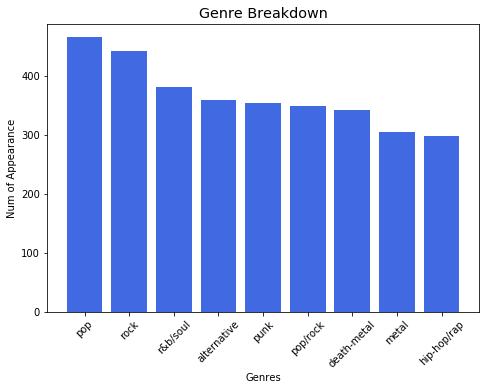

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
r = random.random()
b = random.random()
g = random.random()
color = (r, g, b)
genres = ['pop', 'rock', 'r&b/soul', 'alternative', 'punk','pop/rock','death-metal','metal','hip-hop/rap']
plt.style.use('ggplot')
plt.bar(genres, genre_num,color='royalblue')
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Num of Appearance")
plt.title("Genre Breakdown")
plt.rcParams['figure.figsize'] = [20, 10]
x_pos = [i for i, _ in enumerate(genres)]
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Helvetica'
# plt.rcParams['axes.edgecolor']='#333F4B'
# plt.rcParams['axes.linewidth']=0.8
# plt.rcParams['xtick.color']='#333F4B'
# plt.rcParams['ytick.color']='#333F4B'
plt.xticks(x_pos, genres)
plt.show()

### Genre breakdown version 2

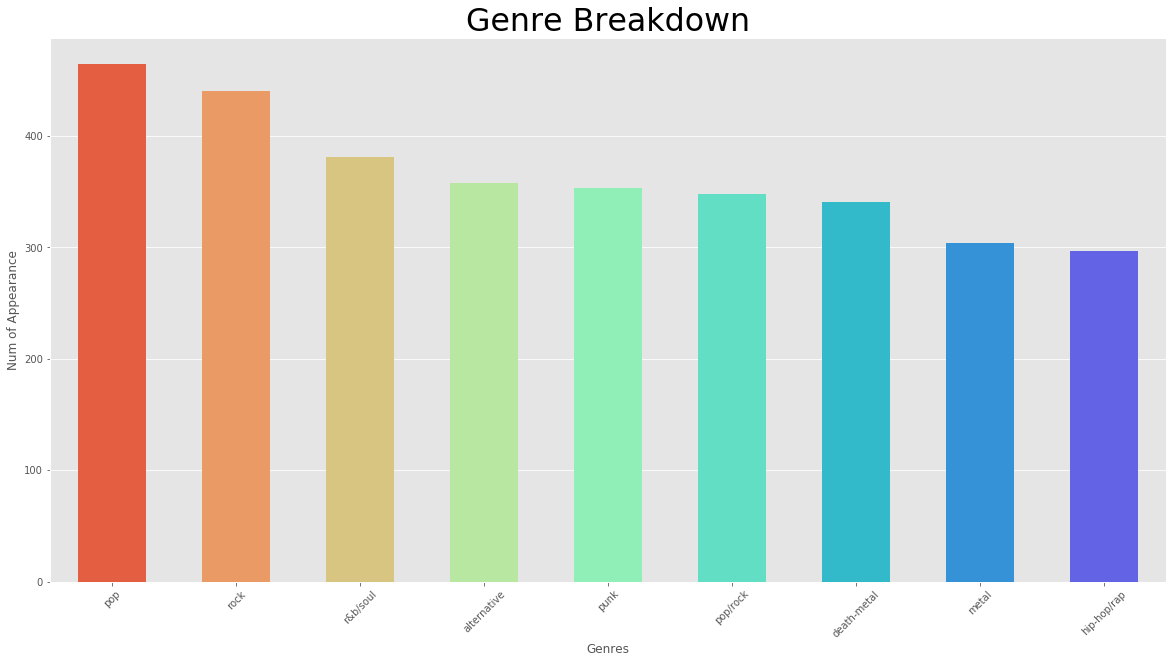

In [9]:

genre = ['pop', 'rock', 'r&b/soul', 'alternative', 'punk','pop/rock','death-metal','metal','hip-hop/rap']
list_of_tuples = list(zip(genre, genre_num))  
            
df1 = pd.DataFrame(list_of_tuples, columns = ['Genre', 'Genre_Num']) 
#print(df1)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
ax = sns.barplot(x = df1.Genre, y = df1.Genre_Num,palette=("rainbow_r"))
change_width(ax, .55)
plt.rcParams['figure.figsize'] = [20, 10]
plt.xlabel("Genres")
plt.ylabel("Num of Appearance")
plt.rcParams.update({'font.size': 22})
plt.title("Genre Breakdown")
ax.set_xticklabels(genre, rotation=45)
sns.set_context("poster")
plt.show()




## Average Words Per Song by Genre

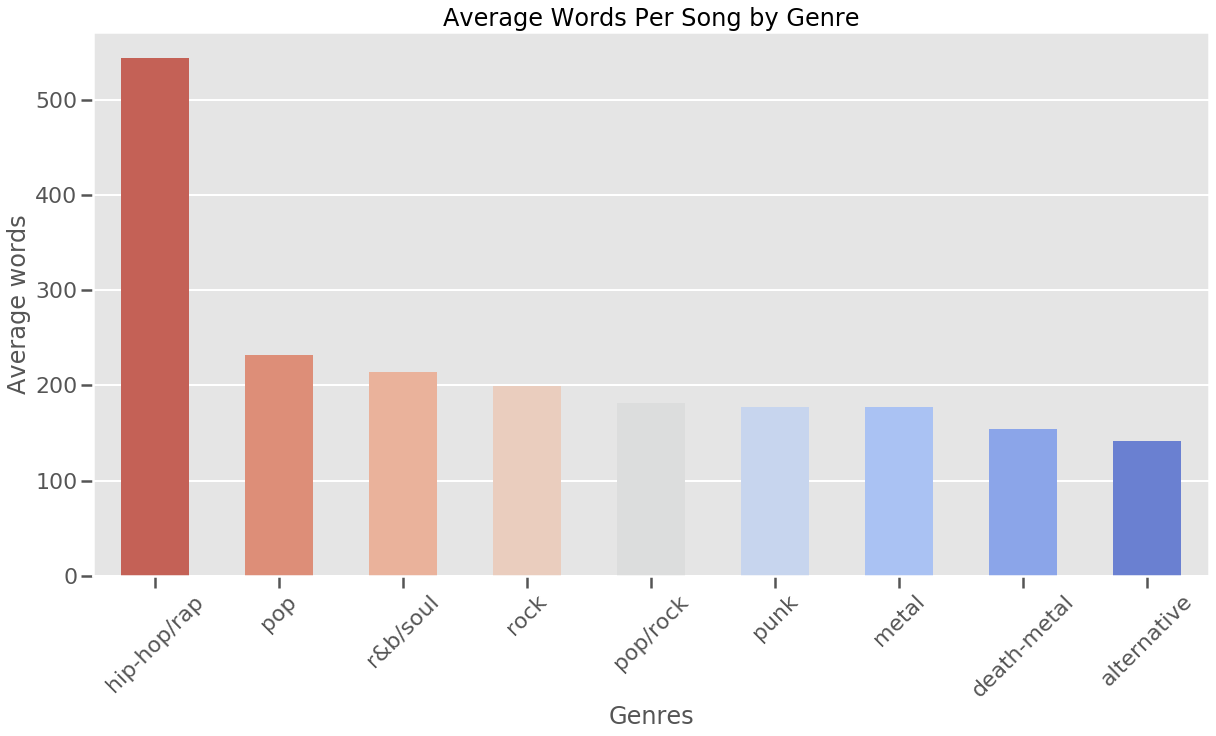

In [10]:
genre_type = lyricsData.genre.unique()
mean = []

for g in genre_type:
     
    df_temp = lyricsData.loc[lyricsData['genre'] == g]
    total = df_temp['lyric_count'].sum()
    mean.append(total/len(df_temp))
    
arr = np.array(mean)
arr = np.rint(arr)
list_of_tuples_2 = list(zip(genre_type, arr))
df2 = pd.DataFrame(list_of_tuples_2, columns = ['Genre', 'lyricsCount'])
df2 = df2.sort_values(by=['lyricsCount'])[::-1]
ax2 = sns.barplot(x = df2.Genre, y = df2.lyricsCount, palette=("coolwarm_r"))
change_width(ax2, .55)
plt.rcParams['figure.figsize'] = [20, 10]
plt.xlabel("Genres")
plt.ylabel("Average words")
plt.rcParams.update({'font.size': 22})
plt.title("Average Words Per Song by Genre")
plt.xticks(rotation=45)
sns.set_context("poster")
plt.show()

In [16]:
print(lyricsData.lyrics.head(10))

0    summer after high school, when we first met we...
1    yeah, yeah, yeah i can feel a phoenix inside o...
2    told them your dreams and they all started lau...
3    if i lost it all today, would you stay? could ...
4    nice legs, daisy dukes makes a man go that is ...
5    i heard you are feeling nothing's going right ...
6    i remember when you used to be my every other ...
7    tonight, tonight, tonight i am walking on air ...
8    do you ever feel like a plastic bag? drifting ...
9    oh, no, did i get too close? oh, did i almost ...
Name: lyrics, dtype: object


In [17]:
# Insert these commands to download package before proceeding

# $ python -m nltk.downloader stopwords

# $ python -m nltk.downloader punkt

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data Cleaning

In [20]:
# Stop point added. Stopwords filtering takes very long too run
for i in range(len(lyricsData)):
    
    # Remove all punctuations
    lyricsData['lyrics'].values[i] = re.sub(r'[^\w\s]', '', lyricsData['lyrics'].values[i])
    
    # Remove all stopwords. You can check all stopwords in previous cell.
    text_tokens = word_tokenize(lyricsData['lyrics'].values[i])
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    filtered_string = (" ").join(tokens_without_sw)
    lyricsData['lyrics'].values[i] = filtered_string
    lyrics_count_new = len(lyricsData['lyrics'].values[i].split())
    lyricsData['lyric_count'].values[i] = lyrics_count_new 
    
    
    
    
lyricsData.to_csv(index=False)
# lyricsData.head(10)

    

'artist,song,lyrics,genre,lyric_count,lyric_count_norm\nKaty Perry,The One That Got Away acoustic,summer high school first would makeout mustang radiohead 18th birthday got matching tattoos used steal parents liquor climb roof talk future like clue never planned day would losing another life would girl would keep promises us world another life would make stay say got away got away june johnny cash never without made pact sometimes miss put records woah someone said tattoo removed saw downtown singing blues time music longer muse keep promises us world ohh money buy time machine replace million rings shoulda told meant woah pay price,pop,89,7.489217498459643\nKaty Perry,Who Am I Living For,yeah yeah yeah feel phoenix inside march alone different beat slowly swallowing fear yeah yeah ready road less traveled suiting crowning battle test cross bear get never easy chosen never easy called standing front line bombs start fall see heavens still hear flames calling see writing wall ignore liv

In [11]:
# $ pip install wordcloud

In [13]:
from wordcloud import WordCloud, STOPWORDS 
comment_words= ""
stopwords = set(STOPWORDS) 
df = pd.read_csv("data.csv")

## Word Cloud

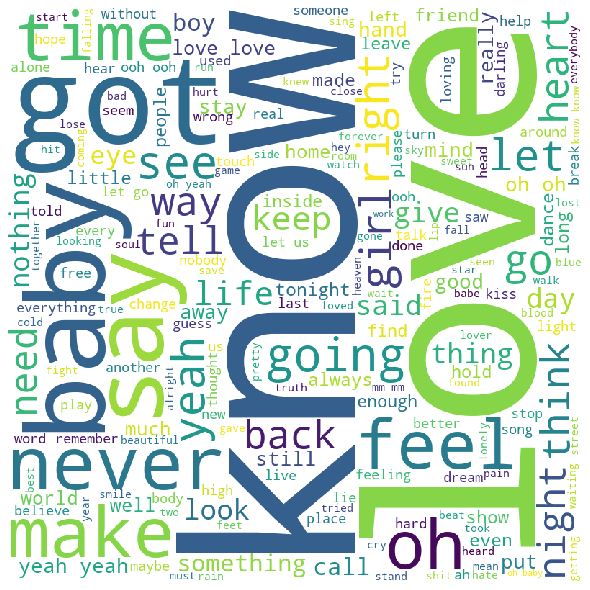

In [40]:
#genre:pop
dfPop = df.loc[df['genre'] == "pop"]
for val in dfPop.lyrics:
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

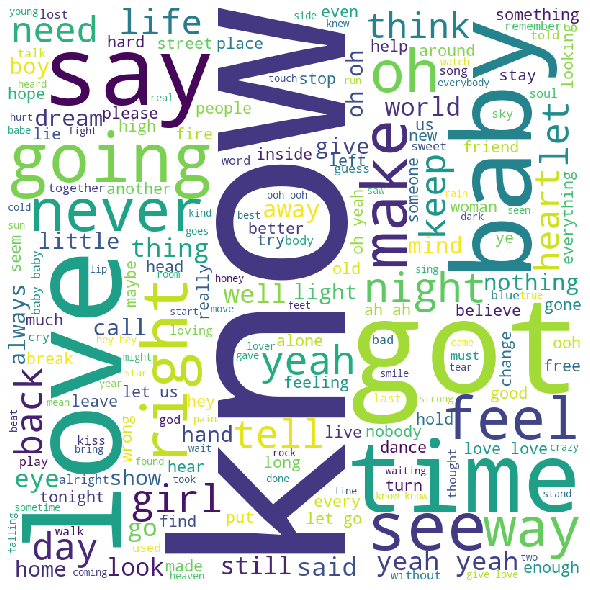

In [41]:
#genre rock
dfPop = df.loc[df['genre'] == "rock"]
for val in dfPop.lyrics:
    tokens = val.split() 
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Top 10 Most Frequent Words for All Genres

In [14]:
wordlist = []

for val in df.lyrics:
    tokens = val.split() 
    wordlist.append(tokens)
wordlist = sum(wordlist, [])
wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))
list_of_tuples_3 = list(zip(wordlist, wordfreq))
df3 = pd.DataFrame(list_of_tuples_3, columns = ['Word', 'Frequency'])
df3 = df3.sort_values(by=['Frequency'])[::-1]
df3 = df3.drop_duplicates(subset=['Word'])
df3 = df3.head(10)
print(df3)


        Word  Frequency
248642  like       4159
238743  know       3774
75154    got       3451
14721   love       3411
209893  yeah       3353
152194    oh       2794
76986    get       2533
87390   time       2181
316938    go       2124
273368   see       2062


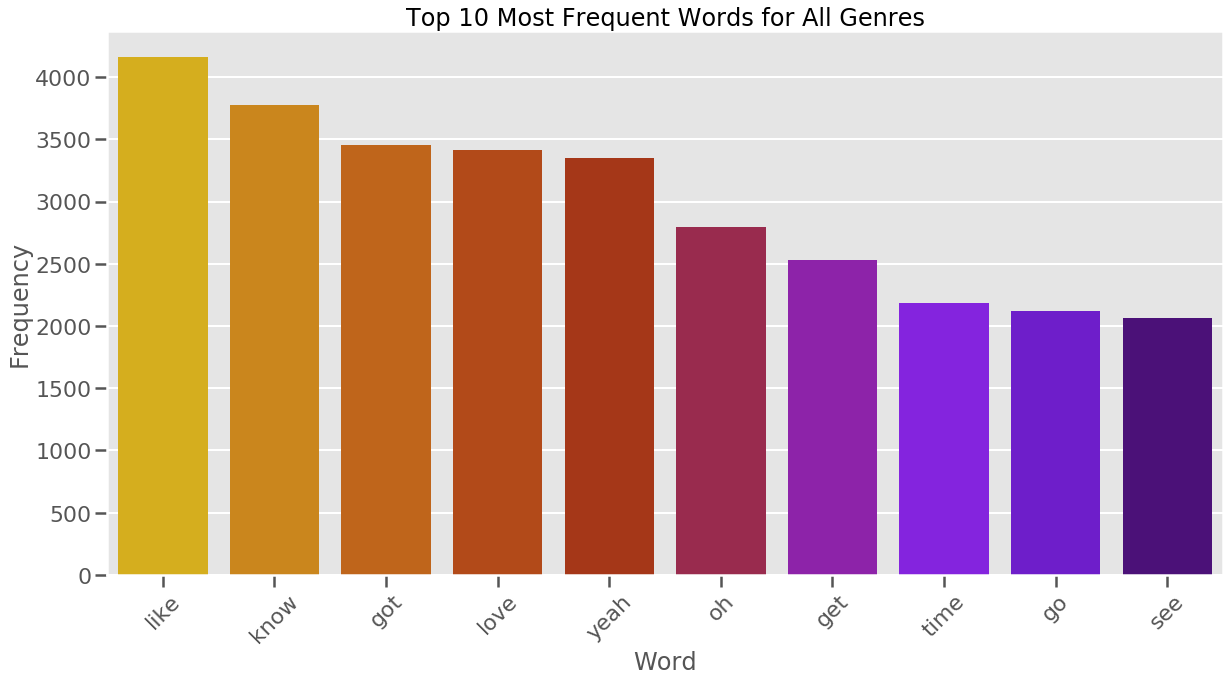

In [15]:
ax3 = sns.barplot(x = df3.Word, y = df3.Frequency, palette=("gnuplot_r"))
change_width(ax2, .55)
plt.rcParams['figure.figsize'] = [20, 10]
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.rcParams.update({'font.size': 22})
plt.title("Top 10 Most Frequent Words for All Genres")
plt.xticks(rotation=45)
sns.set_context("poster")
plt.savefig('Top10.pdf',pad_inches=1)
fig.savefig('out.pdf')
plt.show()